In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [5]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

Data shape: (45211, 9)


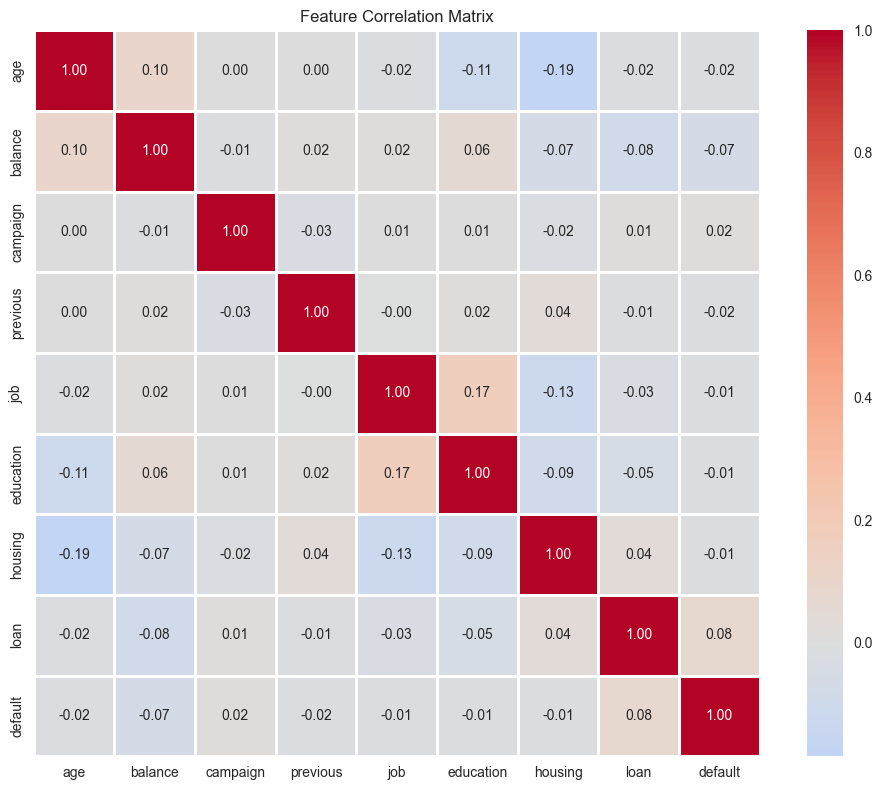

In [6]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset."""
    # Load data with semicolon separator
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

def plot_correlation_heatmap(df, features):
    """Plot correlation heatmap for features."""
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[features].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, square=True, linewidths=1)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
           'housing', 'loan', 'default']
plot_correlation_heatmap(data, features)

In [7]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]   

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        #np.random.seed(self.random_state)
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1) 

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            cluster_points = X[labels == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
            else:
                new_centroids[k] = self.centroids[k]  
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)
        for i in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        self.labels = self._assign_clusters(X)
        return self      
        #raise NotImplementedError("fit must be implemented by the student")

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

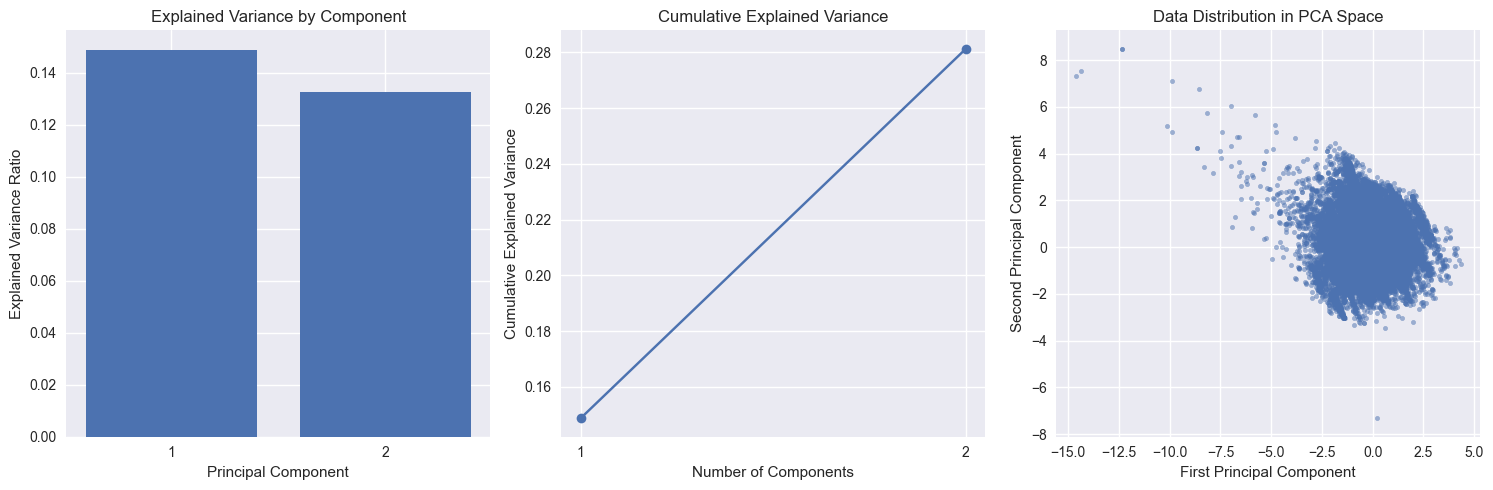

Explained variance by PC1: 0.1488
Explained variance by PC2: 0.1324
Total explained variance: 0.2812
Shape after PCA: (45211, 2)


In [8]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # Plot 1: Explained variance ratio
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Component')
    plt.xticks(range(1, n_components + 1))

    # Plot 2: Cumulative explained variance
    plt.subplot(1, 3, 2)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.grid(True)
    plt.xticks(range(1, n_components + 1))

    # Plot 3: Data distribution in 2D
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Data Distribution in PCA Space')

    plt.tight_layout()
    plt.show()

    print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.4f}")
    print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.4f}")
    print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

    return X_pca
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

Computing elbow curve...
k=2: Inertia=75892.03, Silhouette=0.3311
k=3: Inertia=48179.64, Silhouette=0.3867
k=4: Inertia=38059.02, Silhouette=0.3581
k=5: Inertia=31800.29, Silhouette=0.3494
k=6: Inertia=27188.82, Silhouette=0.3669
k=7: Inertia=23384.33, Silhouette=0.3719
k=8: Inertia=20709.54, Silhouette=0.3751
k=9: Inertia=19113.00, Silhouette=0.3689
k=10: Inertia=17985.76, Silhouette=0.3445


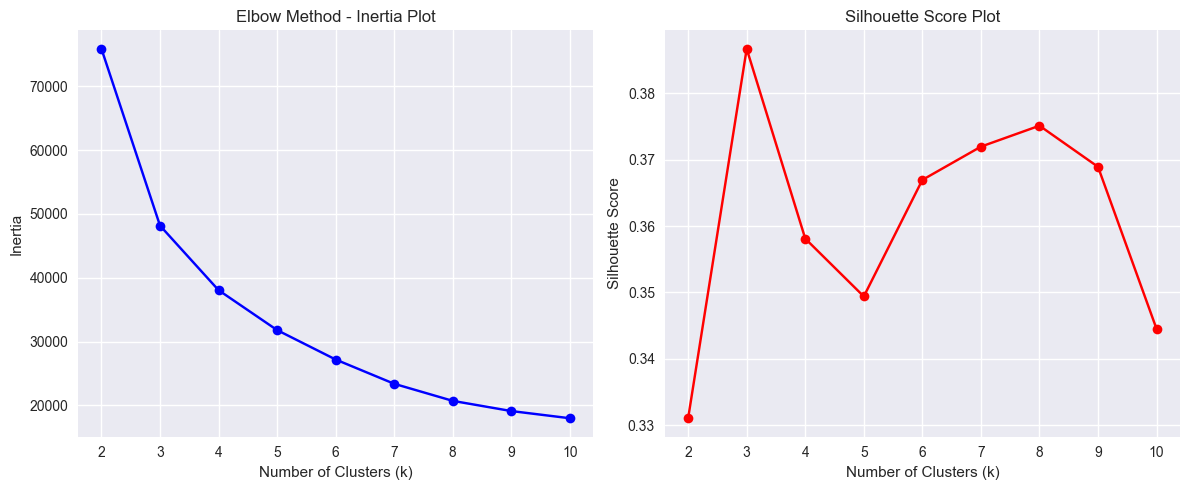

Final centroids:
 [[ 1.16180335  0.4027139 ]
 [-1.04902366  1.09281623]
 [-0.35551135 -0.92038007]]


In [9]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
            inertia += np.sum(distances ** 2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters."""
    inertias = []
    silhouette_scores = []
    K = range(2, max_k + 1)  # Start from 2 for silhouette score

    print("Computing elbow curve...")
    for k in K:
        kmeans = KMeansClustering(n_clusters=k)
        kmeans.fit(X)
        inertia = calculate_inertia(X, kmeans.labels, kmeans.centroids)
        inertias.append(inertia)

        # Calculate silhouette score
        if k > 1:
            sil_score = silhouette_score(X, kmeans.labels)
            silhouette_scores.append(sil_score)
        print(f"k={k}: Inertia={inertia:.2f}, Silhouette={sil_score:.4f}")

    # Create elbow plot
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method - Inertia Plot')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Plot')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return inertias, silhouette_scores

inertias, silhouette_scores = plot_elbow_curve(X_pca, max_k=10)
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_pca)
print("Final centroids:\n", kmeans.centroids)   

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [10]:
class BisectingKMeans:
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        n_samples = X.shape[0]
        self.labels_ = np.zeros(n_samples, dtype=int)
        next_label = 1
        self.centers_[0] = X.mean(axis=0)

        while len(np.unique(self.labels_)) < self.n_clusters:
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]
            mask = self.labels_ == largest_cluster
            cluster_points = X[mask]

            km = kmeans(n_clusters=2, random_state=self.random_state, n_init=10)
            sub_labels = km.fit_predict(cluster_points)

            new_label = next_label
            next_label += 1

            temp_labels = self.labels_[mask].copy()
            temp_labels[sub_labels == 1] = new_label
            self.labels_[mask] = temp_labels

            self.centers_[largest_cluster] = km.cluster_centers_[0]
            self.centers_[new_label] = km.cluster_centers_[1]
            self.split_tree[largest_cluster] = (largest_cluster, new_label)

        return self.labels_


Running final K-means clustering with k=3...


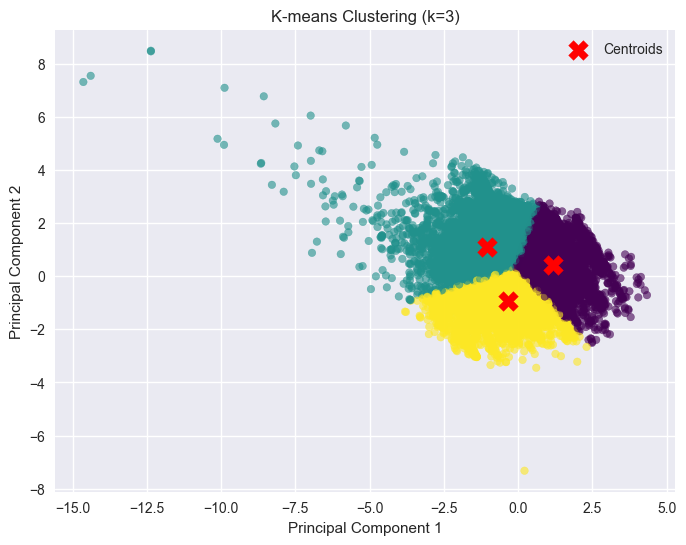


Final K-means (k=3) Silhouette Score: 0.3867


In [11]:
print("Running final K-means clustering with k=3...")

# 1. Instantiate and fit the model
kmeans_final = KMeansClustering(n_clusters=3, random_state=42)
kmeans_final.fit(X_pca)  # Use the .fit() method

# 2. Get the labels from the attribute
kmeans_labels = kmeans_final.labels

# 3. Get the final centroids
kmeans_centroids = kmeans_final.centroids

# 4. Visualize the results
def visualize_clustering_results(X, labels, centroids, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, s=30)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    
visualize_clustering_results(X_pca, kmeans_labels, kmeans_centroids, "K-means Clustering (k=3)")

# 5. Calculate and print the final silhouette score
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
print(f"\nFinal K-means (k=3) Silhouette Score: {kmeans_silhouette:.4f}")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

In [16]:
def kmeans_plus_plus_init(X, k, random_state=42):
    np.random.seed(random_state)
    centroids = []
    centroids.append(X[np.random.choice(len(X))])
    for _ in range(1, k):
        dist_sq = np.min(np.linalg.norm(X[:, None] - np.array(centroids)[None, :], axis=2)**2, axis=1)
        probs = dist_sq / dist_sq.sum()
        next_idx = np.random.choice(len(X), p=probs)
        centroids.append(X[next_idx])
    return np.array(centroids)
def load_data(filepath):
    """Load and preprocess the bank marketing dataset."""
    # Load data with semicolon separator
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

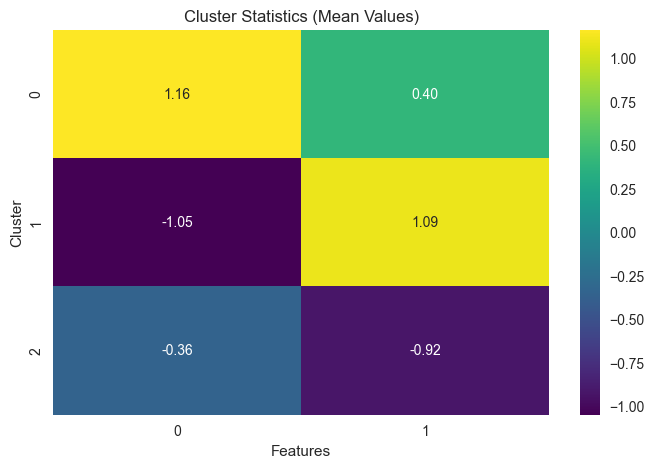

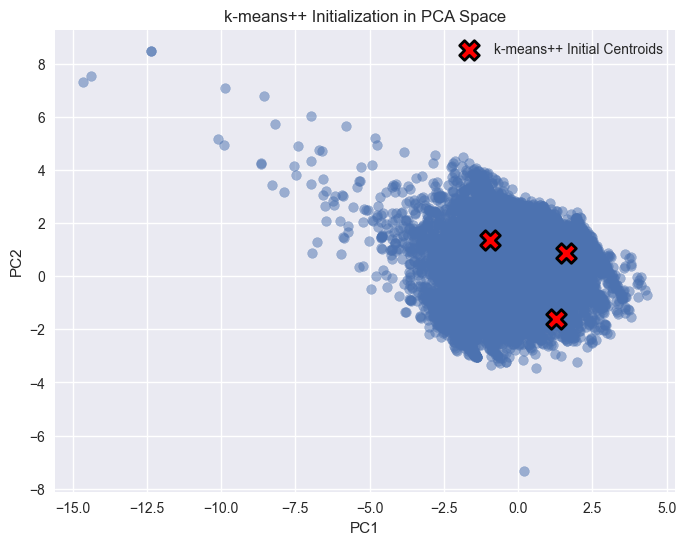

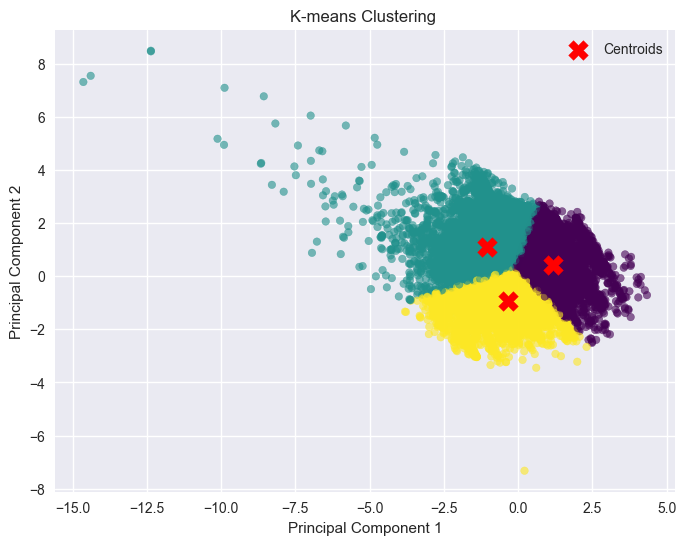

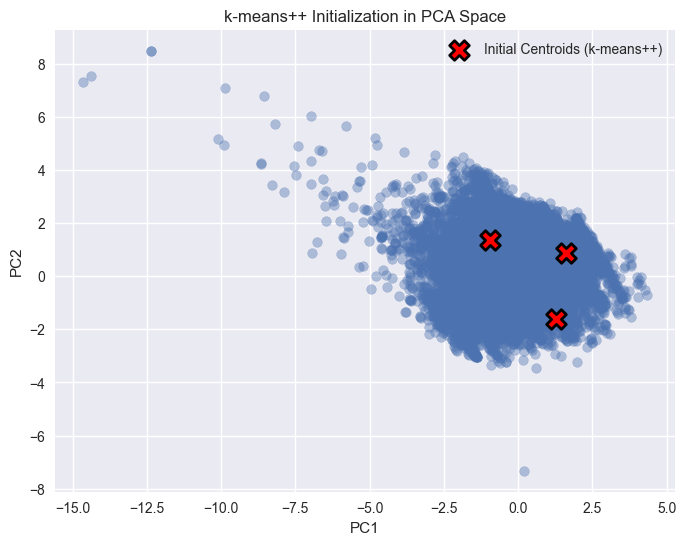

In [21]:
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b), axis=1)


def compute_cluster_stats(X, labels):
    df = pd.DataFrame(X)
    df['cluster'] = labels
    return df.groupby('cluster').mean()


def detect_outliers(X, centroids, threshold=2.5):
    dist = np.min(np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2), axis=1)
    return np.where(dist > threshold * dist.std())[0]


def kmeans_plus_plus_init(X, k, random_state=42):
    np.random.seed(random_state)
    centroids = [X[np.random.choice(len(X))]]
    for _ in range(1, k):
        dist_sq = np.min(np.linalg.norm(X[:, None] - np.array(centroids)[None, :], axis=2)**2, axis=1)
        probs = dist_sq / dist_sq.sum()
        idx = np.random.choice(len(X), p=probs)
        centroids.append(X[idx])
    return np.array(centroids)


stats = compute_cluster_stats(X_pca, kmeans.labels)
outliers = detect_outliers(X_pca, kmeans.centroids)
init_centroids = kmeans_plus_plus_init(X_pca, 3)

def visualize_cluster_stats(stats):
    plt.figure(figsize=(8, 5))
    sns.heatmap(stats, annot=True, cmap='viridis', fmt=".2f")
    plt.title("Cluster Statistics (Mean Values)")
    plt.xlabel("Features")
    plt.ylabel("Cluster")
    plt.show()

# Use it
visualize_cluster_stats(stats)

def visualize_initial_centroid(X_pca, init_centroids):
    plt.figure(figsize=(8, 6))

    # All points
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

    # Initial centroids selected by k-means++
    plt.scatter(
        init_centroids[:, 0], init_centroids[:, 1],
        c='red', s=200, marker='X', edgecolors='black', linewidths=2,
        label="k-means++ Initial Centroids"
    )

    plt.title("k-means++ Initialization in PCA Space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()

# Use it
visualize_initial_centroid(X_pca, init_centroids)

def visualize_clustering_result(X, labels, centroids, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, s=30)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
visualize_clustering_result(X_pca, kmeans_labels, kmeans_centroids, "K-means Clustering ")

def visualize_initial_centroids(X_pca, init_centroids):
    plt.figure(figsize=(8, 6))
    
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.4)
    
    plt.scatter(
        init_centroids[:, 0], init_centroids[:, 1],
        c='red', s=200, marker='X',
        edgecolors='black', linewidths=2,
        label="Initial Centroids (k-means++)"
    )
    
    plt.title("k-means++ Initialization in PCA Space")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()
visualize_initial_centroids(X_pca, init_centroids)